In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# importing dataset

In [2]:
data=pd.read_csv('C:/Users/HP/Downloads/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## data preprocessing

C:\Users\HP\AppData\Local\Temp\ipykernel_7268\1087922965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

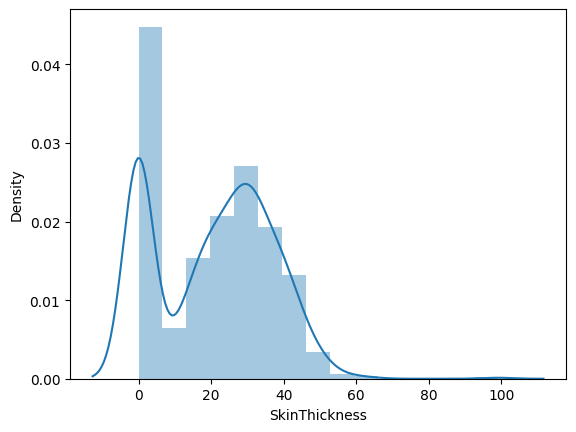

In [4]:
sns.distplot(data['SkinThickness'])

In [5]:
## there are some missing value in skin thickneses column so handling it with knn algo 

data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)

In [6]:

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) 
data['SkinThickness'] = imputer.fit_transform(data[['SkinThickness', 'BMI', 'Insulin', 'Glucose']])[:, 0]


<Axes: xlabel='SkinThickness', ylabel='Count'>

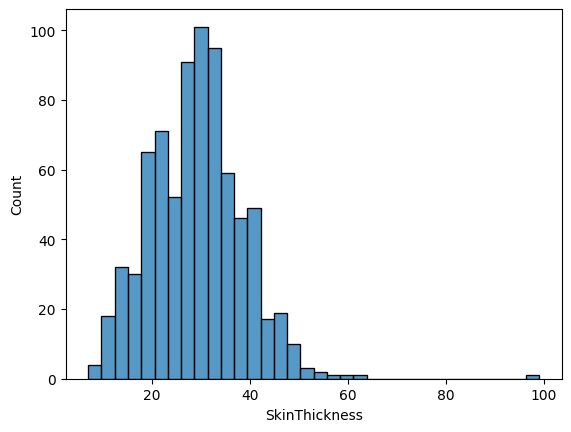

In [7]:
sns.histplot(data['SkinThickness']) ## since it skew we should handle it but i will use random forest so it does not matter 

In [8]:
data['Insulin'].replace(0,np.nan,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7268\4221645967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Insulin'].replace(0,np.nan,inplace=True)


In [9]:
from sklearn.impute import KNNImputer

# Create the imputer with 5 nearest neighbors
imputer2 = KNNImputer(n_neighbors=5)

# Apply the imputer to the 'Insulin' column using related features
data[['Insulin']] = imputer2.fit_transform(data[['Insulin', 'BMI', 'SkinThickness', 'Glucose']])[:, [0]]


<Axes: xlabel='Insulin', ylabel='Count'>

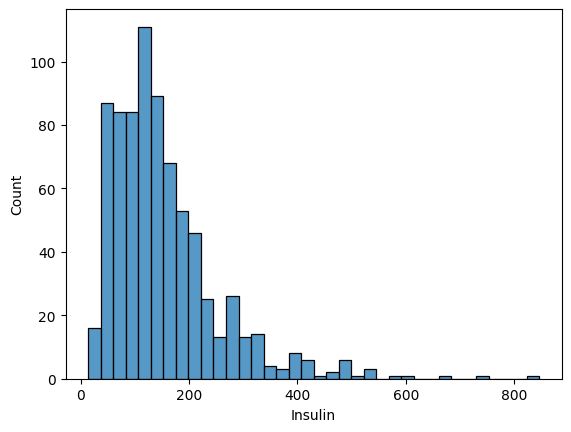

In [10]:
sns.histplot(data['Insulin'])

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,157.0,33.6,0.627,50,1
1,1,85,66,29.0,68.0,26.6,0.351,31,0
2,8,183,64,27.0,383.2,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [12]:
## there are almost 5 missing value in glucose for simplicity handling it with median

data['Glucose']=data['Glucose'].replace(0,np.nan)

In [13]:
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7268\2249993220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].fillna(data['Glucose'].median(),inplace=True)


<Axes: xlabel='Glucose', ylabel='Count'>

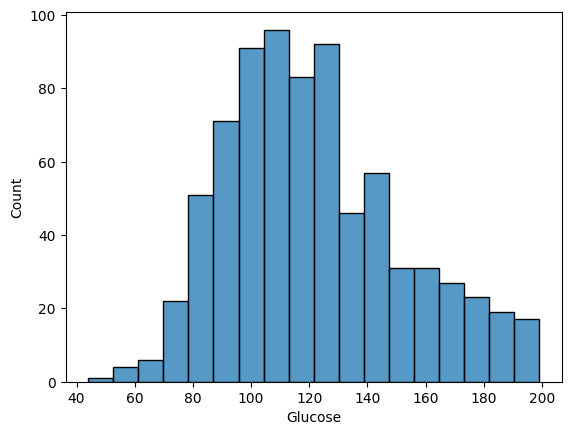

In [14]:
sns.histplot(data['Glucose'])

In [15]:
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)

In [16]:
## there are also lot of misisng value in blood pressure column so handling it with KNN imputer 

imputer3=KNNImputer(n_neighbors=5)

data['BloodPressure']=imputer.fit_transform(data[['Insulin', 'BMI', 'SkinThickness', 'Glucose']])[:,0]

<Axes: xlabel='BloodPressure', ylabel='Count'>

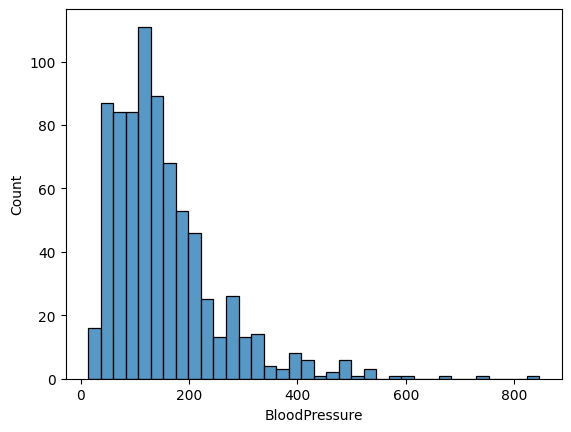

In [17]:
sns.histplot(data['BloodPressure'])

<Axes: ylabel='BloodPressure'>

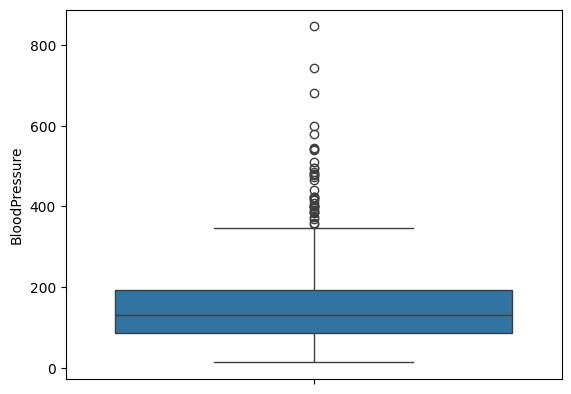

In [18]:
sns.boxplot(data['BloodPressure'])

In [19]:
## lot of outlier as well so handling it 

Q1 = data['BloodPressure'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['BloodPressure'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['BloodPressure'] >= lower_bound) & (data['BloodPressure'] <= upper_bound)]


<Axes: ylabel='BloodPressure'>

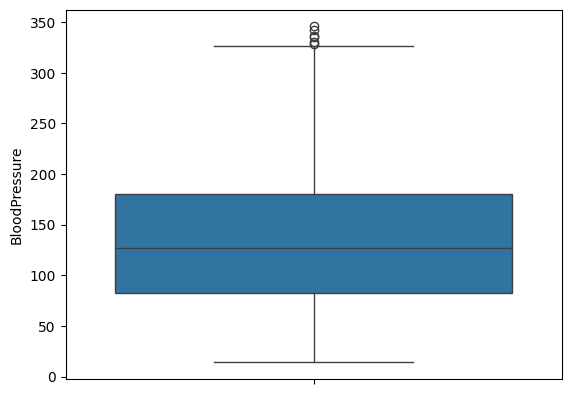

In [20]:
sns.boxplot(data['BloodPressure'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

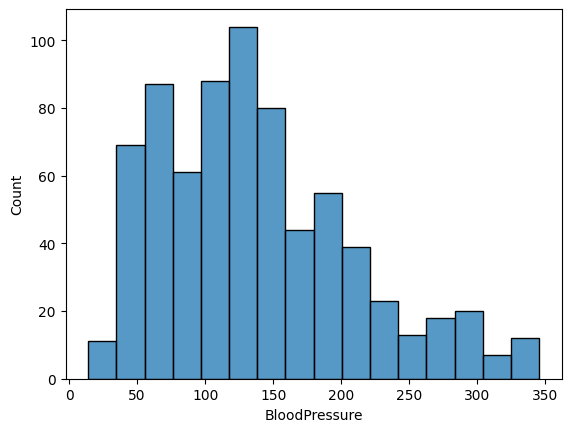

In [21]:
sns.histplot(data['BloodPressure'])  ## by removing outliers distribution also become quite good

In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,157.0,35.0,157.0,33.6,0.627,50,1
1,1,85.0,68.0,29.0,68.0,26.6,0.351,31,0
3,1,89.0,94.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,168.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,114.8,20.6,114.8,25.6,0.201,30,0


<Axes: xlabel='BMI', ylabel='Count'>

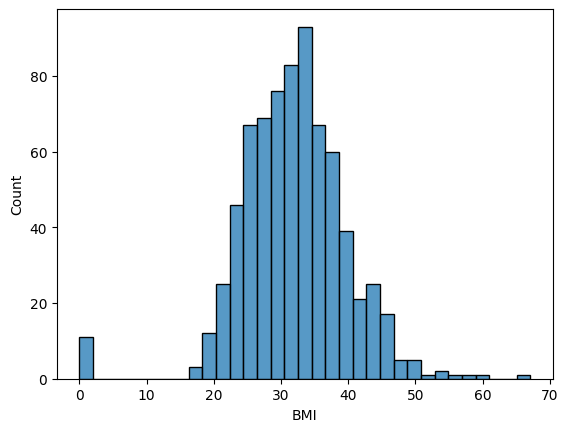

In [23]:
sns.histplot(data['BMI'])

In [24]:
## there are some missing value in BMI but since it very good distributed , handling them by median

data['BMI']=data['BMI'].replace(0,np.nan)

In [25]:
data=data[data['BMI']<60]

In [26]:
data['BMI']=data['BMI'].fillna(data['BMI'].median())

<Axes: xlabel='BMI', ylabel='Count'>

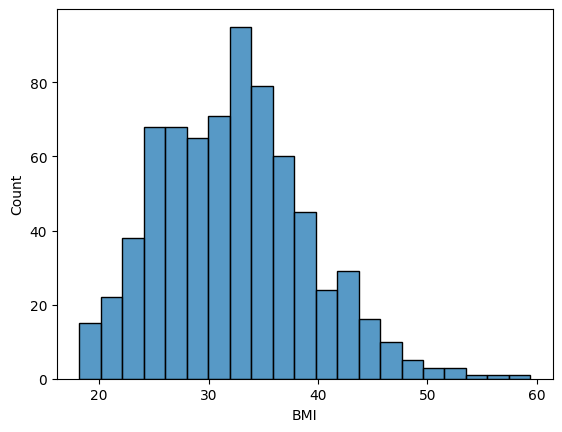

In [27]:
sns.histplot(data['BMI'])

In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,157.0,35.0,157.0,33.6,0.627,50,1
1,1,85.0,68.0,29.0,68.0,26.6,0.351,31,0
3,1,89.0,94.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,168.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,114.8,20.6,114.8,25.6,0.201,30,0


<Axes: ylabel='DiabetesPedigreeFunction'>

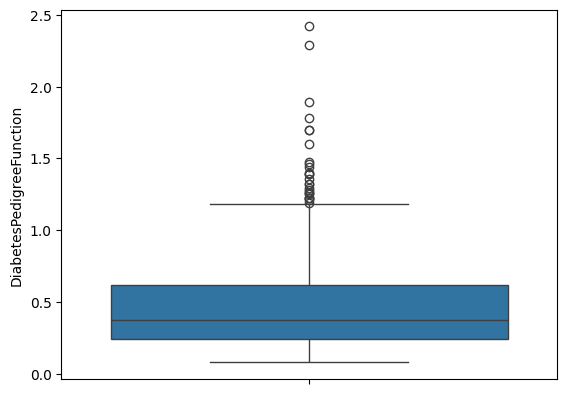

In [29]:
sns.boxplot(data['DiabetesPedigreeFunction'])

In [30]:
## lot of outlier have to handle it 


Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['DiabetesPedigreeFunction'] >= lower_bound) & (data['DiabetesPedigreeFunction'] <= upper_bound)]


<Axes: ylabel='DiabetesPedigreeFunction'>

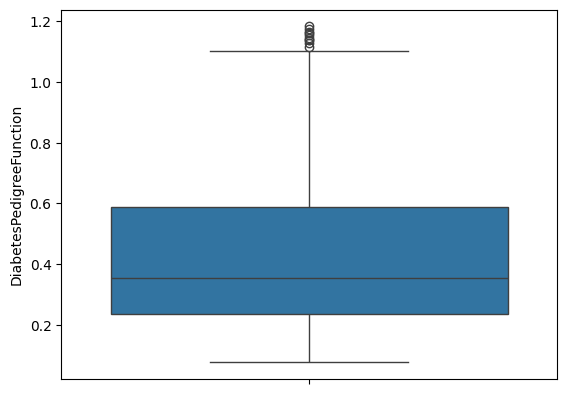

In [31]:
sns.boxplot(data['DiabetesPedigreeFunction'])

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,157.0,35.0,157.0,33.6,0.627,50,1
1,1,85.0,68.0,29.0,68.0,26.6,0.351,31,0
3,1,89.0,94.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,114.8,20.6,114.8,25.6,0.201,30,0
6,3,78.0,88.0,32.0,88.0,31.0,0.248,26,1


In [33]:
## handling outlier in age as well 
Q1 = data['Age'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Age'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]


<Axes: ylabel='Age'>

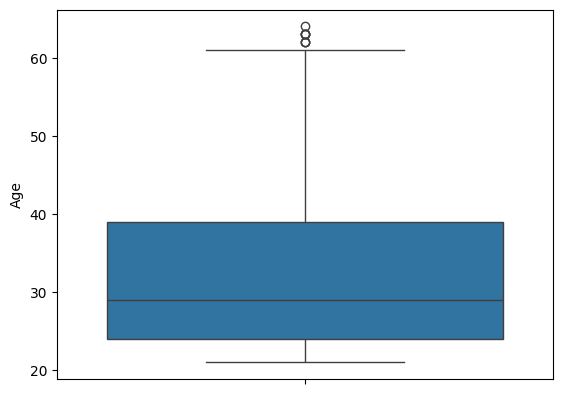

In [34]:
sns.boxplot(data['Age'])

# splitting data

In [35]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same transformation to test data
X_test = scaler.transform(X_test)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## logistic regression 

In [39]:
#from sklearn.linear_model import LogisticRegression
  # Use accuracy for classification

# Define the model
#step1 = LogisticRegression()

# Create pipeline
#pipe = Pipeline([
 #   ('step1', step1)
#])

# Fit the model
#pipe.fit(X_train, y_train)

# Predictions
#y_pred = pipe.predict(X_test)

# Evaluate using classification metric
#print("Accuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.7843137254901961


## K-Nearest Neighbors

In [40]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score

# Define the model
#step1 = KNeighborsClassifier()

# Create a pipeline
#pipe = Pipeline([
 #   ('step1', step1)
])

# Define the hyperparameter grid
#param_grid = {
 #   'step1__n_neighbors': [2, 3, 4, 5 ] 
#}

# Perform GridSearchCV with accuracy as scoring metric
#grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')  # Corrected scoring metric

# Fit the model
#grid.fit(X_train, y_train)

# Get best parameters
#best_params = grid.best_params_

# Make predictions
#y_pred = grid.predict(X_test)

# Print results
#print("Best parameters:", best_params)
#print("Accuracy Score:", accuracy_score(y_test, y_pred))


Best parameters: {'step1__n_neighbors': 5}
Accuracy Score: 0.7843137254901961


# Decison tree

In [41]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score

# Define the model
#step1 = DecisionTreeClassifier()

# Create a pipeline
#pipe = Pipeline([
  #  ('step1', step1)
#])

# Define the hyperparameter grid
#param_grid = {
 #   'step1__max_depth': [2, 3, 4, 5, 7, 14, 20, 30, 40]  
#}

# Perform GridSearchCV
#grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the model
#grid.fit(X_train, y_train) 

# Get the best parameter
#best_param = grid.best_params_

# Make predictions
#y_pred = grid.predict(X_test)

# Print results
#print("Best parameter:", best_param)
#print("Accuracy Score:", accuracy_score(y_test, y_pred))  # Use y_test instead of y_train


Best parameter: {'step1__max_depth': 3}
Accuracy Score: 0.7843137254901961


## Random forest classifier




In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the model
step1 = RandomForestClassifier(random_state=42)  # Ensuring reproducibility

# Create a pipeline
pipe = Pipeline([
    ('step1', step1)
])

# Define a better hyperparameter search space
param_dist = {
    'step1__n_estimators': np.random.randint(50, 500, 10),  # Random values between 50-500
    'step1__max_depth': np.random.randint(10, 100, 5),  # Random values between 10-100
    'step1__min_samples_split': [2, 5, 10, 20],  # Different values for minimum split
    'step1__min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
    'step1__max_features': ['sqrt', 'log2', None]  # Number of features to consider
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe, 
    param_distributions=param_dist, 
    n_iter=20,  # Number of random combinations to try
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,  # Uses all CPU cores for speed
    verbose=2,  
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_

# Make predictions
y_pred = random_search.predict(X_test)

# Print results
print("Best parameters:", best_params)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'step1__n_estimators': 66, 'step1__min_samples_split': 20, 'step1__min_samples_leaf': 1, 'step1__max_features': None, 'step1__max_depth': 63}
Accuracy Score: 0.8137254901960784


In [48]:
import pickle

# Save the trained pipeline
pickle.dump(random_search.best_estimator_, open('diabitiesPipe.pkl', 'wb'))

print("Trained model saved as 'pipe.pkl'!")

Trained model saved as 'pipe.pkl'!


In [49]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 387, 1: 191}
